# Data Preparation

In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np

import matplotlib.pyplot as plt

from env import get_db_url

import prepare as p

In [2]:
url = get_db_url('tsa_item_demand')

In [3]:
sql = '''SELECT *
         FROM sales
         JOIN items USING (item_id)
         JOIN stores USING (store_id);'''

In [4]:
df = pd.read_sql(sql, url)

In [5]:
df.head()

,store_id,item_id,sale_id,sale_date,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
0,1,1,1,2013-01-01,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,1,2,2013-01-02,11,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,1,1,3,2013-01-03,14,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
3,1,1,4,2013-01-04,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
4,1,1,5,2013-01-05,10,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


In [6]:
df.to_csv('sale_items.csv', index=False)

In [7]:
df = pd.read_csv('sale_items.csv')

In [8]:
df.head()

,store_id,item_id,sale_id,sale_date,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
0,1,1,1,2013-01-01,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,1,2,2013-01-02,11,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,1,1,3,2013-01-03,14,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
3,1,1,4,2013-01-04,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
4,1,1,5,2013-01-05,10,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


In [9]:
df.shape

(913000, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   store_id       913000 non-null  int64  
 1   item_id        913000 non-null  int64  
 2   sale_id        913000 non-null  int64  
 3   sale_date      913000 non-null  object 
 4   sale_amount    913000 non-null  int64  
 5   item_upc14     913000 non-null  int64  
 6   item_upc12     913000 non-null  int64  
 7   item_brand     913000 non-null  object 
 8   item_name      913000 non-null  object 
 9   item_price     913000 non-null  float64
 10  store_address  913000 non-null  object 
 11  store_zipcode  913000 non-null  int64  
 12  store_city     913000 non-null  object 
 13  store_state    913000 non-null  object 
dtypes: float64(1), int64(7), object(6)
memory usage: 97.5+ MB


## 1. Using your store items data:

### a. Convert date column to datetime format.

In [11]:
df.sale_date = df.sale_date.astype('datetime64')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   store_id       913000 non-null  int64         
 1   item_id        913000 non-null  int64         
 2   sale_id        913000 non-null  int64         
 3   sale_date      913000 non-null  datetime64[ns]
 4   sale_amount    913000 non-null  int64         
 5   item_upc14     913000 non-null  int64         
 6   item_upc12     913000 non-null  int64         
 7   item_brand     913000 non-null  object        
 8   item_name      913000 non-null  object        
 9   item_price     913000 non-null  float64       
 10  store_address  913000 non-null  object        
 11  store_zipcode  913000 non-null  int64         
 12  store_city     913000 non-null  object        
 13  store_state    913000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(7), object(5

### b. Plot the distribution of sale_amount and item_price.

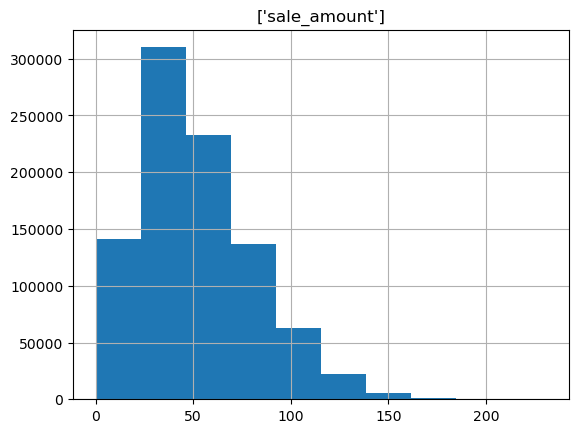

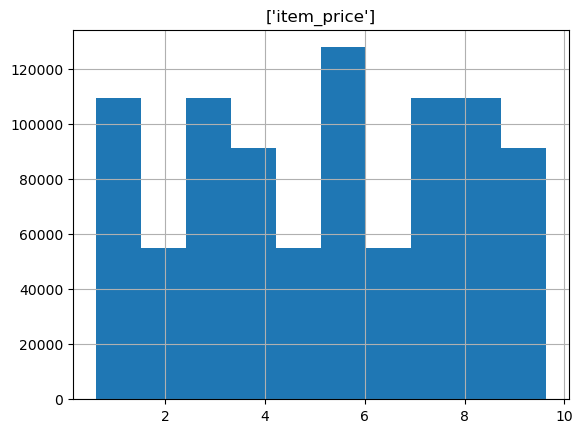

In [13]:
cols = ['sale_amount', 'item_price']

for col in cols:
    df[col].hist()
    plt.title([col])
    plt.show()

### c. Set the index to be the datetime variable.

In [14]:
df = df.set_index('sale_date')

In [15]:
df.head()

,store_id,item_id,sale_id,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,,,,,,
2013-01-01,1,1,1,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-02,1,1,2,11,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-03,1,1,3,14,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-04,1,1,4,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-05,1,1,5,10,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


### d. Add a 'month' and 'day of week' column to your dataframe.

In [16]:
df['month'] = df.index.month

In [17]:
df['day_of_week'] = df.index.day_of_week

In [18]:
df.head()

,store_id,item_id,sale_id,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,1,1,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,1
2013-01-02,1,1,2,11,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,2
2013-01-03,1,1,3,14,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,3
2013-01-04,1,1,4,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,4
2013-01-05,1,1,5,10,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,5


### e. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [19]:
df['sales_total'] = df.sale_amount * df.item_price

In [20]:
df.head()

,store_id,item_id,sale_id,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,1,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,1,10.92
2013-01-02,1,1,2,11,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,2,9.24
2013-01-03,1,1,3,14,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,3,11.76
2013-01-04,1,1,4,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,4,10.92
2013-01-05,1,1,5,10,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,5,8.40


### f. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [21]:
df = pd.read_csv('sale_items.csv')

In [22]:
df.head()

,store_id,item_id,sale_id,sale_date,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
0,1,1,1,2013-01-01,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,1,2,2013-01-02,11,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,1,1,3,2013-01-03,14,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
3,1,1,4,2013-01-04,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
4,1,1,5,2013-01-05,10,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


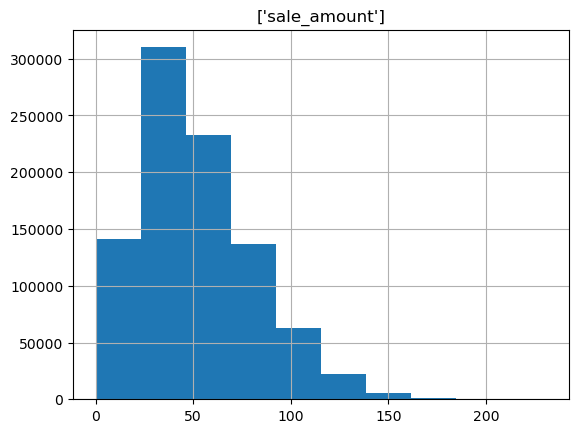

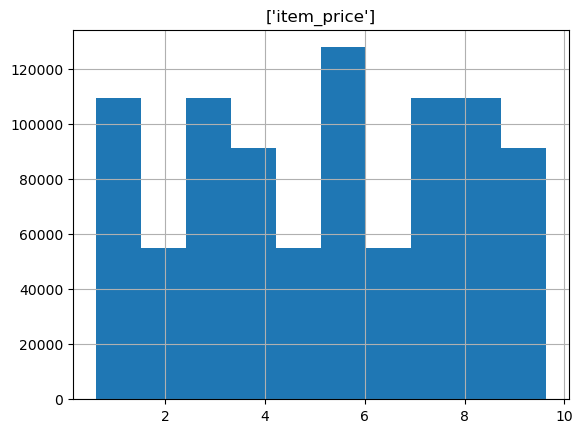

In [23]:
df = p.prep_sales_data(df)

In [24]:
df.head()

,store_id,item_id,sale_id,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,1,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,1,10.92
2013-01-02,1,1,2,11,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,2,9.24
2013-01-03,1,1,3,14,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,3,11.76
2013-01-04,1,1,4,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,4,10.92
2013-01-05,1,1,5,10,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,5,8.40


## 2. Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

In [36]:
germany = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')

In [26]:
germany.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [28]:
germany.to_csv('opsd_germany_daily.csv')

In [32]:
germany.shape

(4383, 5)

In [31]:
germany.isnull().sum()

Date              0
Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64

In [33]:
germany.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

### a. Convert date column to datetime format.

In [37]:
germany.columns = germany.columns.str.lower()

In [39]:
germany.columns = germany.columns.str.replace('+', '_')

/var/folders/q0/ltx9pcc929qfz0h96j9rxxk80000gp/T/ipykernel_65790/216138693.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  germany.columns = germany.columns.str.replace('+', '_')


In [41]:
germany.date = germany.date.astype('datetime64')

In [43]:
germany.dtypes

date           datetime64[ns]
consumption           float64
wind                  float64
solar                 float64
wind_solar            float64
dtype: object

### b. Plot the distribution of each of your variables.

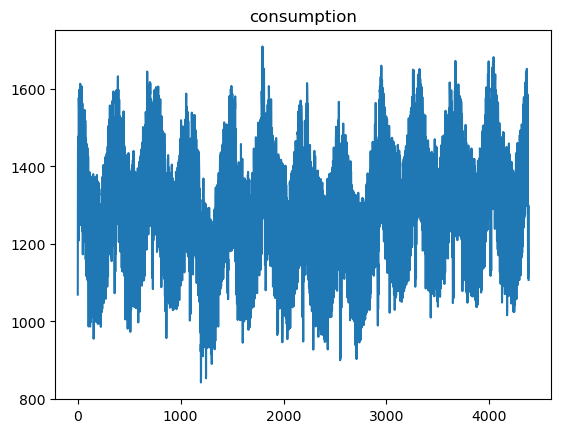

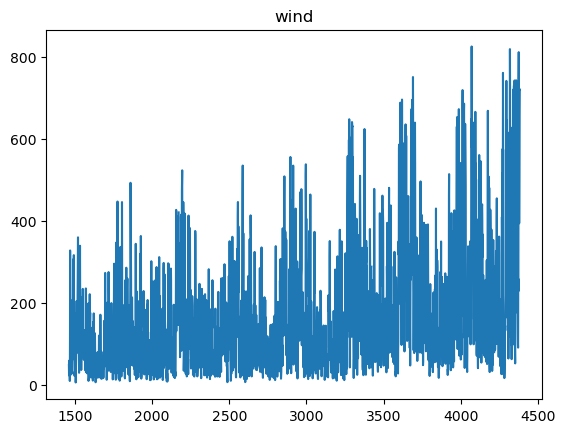

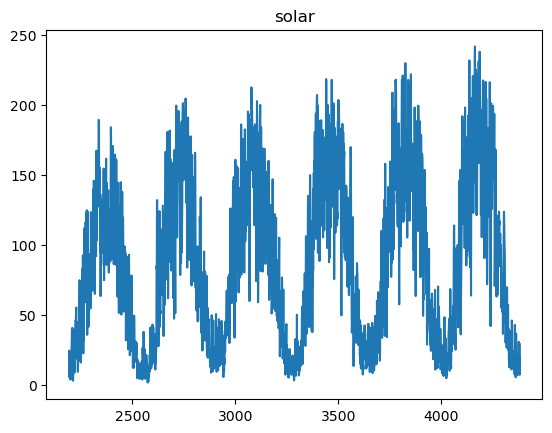

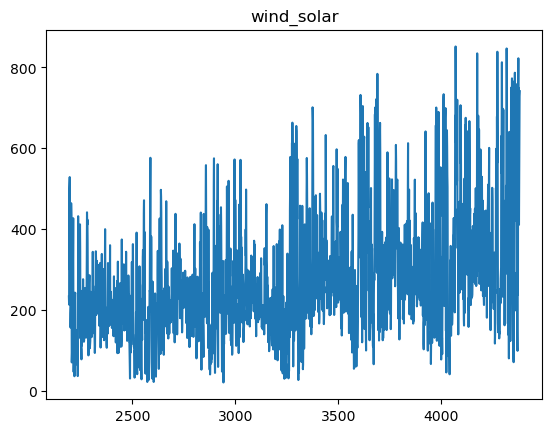

In [50]:
for col in germany.columns[1:]:
        germany[col].plot()
        plt.title(col)
        plt.show()

### c. Set the index to be the datetime variable.

In [51]:
germany = germany.set_index('date')

In [52]:
germany.head()

,consumption,wind,solar,wind_solar
date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


### d. Add a month and a year column to your dataframe.

In [53]:
germany['month'] = germany.index.month

In [54]:
germany['year'] = germany.index.year

In [55]:
germany.head()

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,1,2006
2006-01-03,1442.533,NaN,NaN,NaN,1,2006
2006-01-04,1457.217,NaN,NaN,NaN,1,2006
2006-01-05,1477.131,NaN,NaN,NaN,1,2006


### e. Fill any missing values.

In [59]:
germany.shape

(4383, 6)

In [ ]:
# instructor answer
# germany.fillna(0, inplace=True)

In [60]:
germany.index.min()

Timestamp('2006-01-01 00:00:00')

In [62]:
germany.index.max()

Timestamp('2017-12-31 00:00:00')

In [65]:
germany.loc[['2006-01-01', '2007-01-01', '2008-01-01','2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01' ]]

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2007-01-01,1128.843,NaN,NaN,NaN,1,2007
2008-01-01,1083.424,NaN,NaN,NaN,1,2008
2009-01-01,1018.975,NaN,NaN,NaN,1,2009
2010-01-01,1057.372,48.709,NaN,NaN,1,2010
2011-01-01,1080.314,255.424,NaN,NaN,1,2011
2012-01-01,948.128,227.465,6.587,234.052,1,2012
2013-01-01,906.910,262.438,14.218,276.656,1,2013
2014-01-01,1080.080,220.085,30.493,250.578,1,2014


In [66]:
germany.loc[['2006-01-01', '2007-01-01', '2008-01-01','2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01' ]].wind.mean()

219.197875

In [67]:
germany.loc[['2006-01-01', '2007-01-01', '2008-01-01','2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01']].wind.median()

241.4445

In [71]:
germany.loc[['2006-01-01', '2007-01-01', '2008-01-01','2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01' ]].solar.mean()

20.37183333333334

In [72]:
germany.loc[['2006-01-01', '2007-01-01', '2008-01-01','2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01' ]].solar.median()

17.820999999999998

In [69]:
germany.loc['2006-01-01':'2006-12-31'].wind.mean()

nan

In [70]:
germany.loc['2010-01-01':'2010-12-31'].wind.mean()

98.3884301369863

In [75]:
germany.consumption.isnull().sum()

0

In [76]:
germany.loc[germany.wind.isnull()]

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,1,2006
2006-01-03,1442.533,NaN,NaN,NaN,1,2006
2006-01-04,1457.217,NaN,NaN,NaN,1,2006
2006-01-05,1477.131,NaN,NaN,NaN,1,2006
...,...,...,...,...,...,...
2009-12-29,1207.905,NaN,NaN,NaN,12,2009
2009-12-30,1192.196,NaN,NaN,NaN,12,2009
2009-12-31,1106.467,NaN,NaN,NaN,12,2009


In [77]:
germany.loc[germany.solar.isnull()]

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,1,2006
2006-01-03,1442.533,NaN,NaN,NaN,1,2006
2006-01-04,1457.217,NaN,NaN,NaN,1,2006
2006-01-05,1477.131,NaN,NaN,NaN,1,2006
...,...,...,...,...,...,...
2011-12-31,1077.625,83.185,NaN,NaN,12,2011
2013-03-30,1092.932,20.545,NaN,NaN,3,2013
2013-03-31,1002.856,39.624,NaN,NaN,3,2013


In [78]:
germany.loc[germany.wind_solar.isnull()]

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,1,2006
2006-01-03,1442.533,NaN,NaN,NaN,1,2006
2006-01-04,1457.217,NaN,NaN,NaN,1,2006
2006-01-05,1477.131,NaN,NaN,NaN,1,2006
...,...,...,...,...,...,...
2013-03-30,1092.932,20.545,NaN,NaN,3,2013
2013-03-31,1002.856,39.624,NaN,NaN,3,2013
2014-03-12,1516.331,NaN,148.507,NaN,3,2014


In [87]:
# no solar or wind data collected from 2006 - 2009 so those rows are dropped
germany = germany.drop(germany.index['2006-01-01':'2009-12-31'])

In [89]:
germany_impute = germany.wind.interpolate(method='time')

In [96]:
germany_impute.loc['2011-12-13':'2011-12-15']

date
2011-12-13    421.130
2011-12-14    354.414
2011-12-15    287.698
Name: wind, dtype: float64

In [97]:
germany_impute.loc[['2012-12-14','2013-12-14','2014-12-14','2015-12-14','2016-12-14','2017-12-14']]

222.31699999999995

In [98]:
germany_impute.loc[['2012-12-14','2013-12-14','2014-12-14','2015-12-14','2016-12-14','2017-12-14']].mean()

222.61549999999997